#OpenVINO影像分類範例

歐尼克斯實境互動工作室 OmniXRI Jack, 2021.6.7

# 1. 安裝Intel OpenVINO工具包
以apt方式安裝OpenVINO，安裝版本為 2021.3.394  
預設安裝路徑為/opt/intel/OpenVINO_2021.3.394，系統會自建出/opt/intel/OpenVINO_2021捷徑名稱，後續可使用這個較短捷徑名稱。

In [1]:
# 顯示目前工作目錄
!pwd
# 取得OpenVINO 2021公開金錀
!wget https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021 
# 加入OpenVINO公開金錀到系統金錀群中
!apt-key add GPG-PUB-KEY-INTEL-OPENVINO-2021 
# 建立更新安裝清單檔案
!touch /etc/apt/sources.list.d/intel-openvino-2021.list
# 將下載指令加入安裝清單中
!echo "deb https://apt.repos.intel.com/openvino/2021 all main" >> /etc/apt/sources.list.d/intel-openvino-2021.list
# 更新系統
!apt update
# 安裝OpenVINO到虛擬機系統中
!apt install intel-openvino-dev-ubuntu18-2021.3.394
# 列出安裝路徑下內容進行確認
!ls /opt/intel

/content
--2021-06-07 06:49:42--  https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021
Resolving apt.repos.intel.com (apt.repos.intel.com)... 104.89.111.218, 2600:140e:6:9a5::4b23, 2600:140e:6:9b9::4b23
Connecting to apt.repos.intel.com (apt.repos.intel.com)|104.89.111.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 939 [binary/octet-stream]
Saving to: ‘GPG-PUB-KEY-INTEL-OPENVINO-2021’

GPG-PUB-KEY-INTEL-O 100%[===================>]     939  --.-KB/s    in 0s      

2021-06-07 06:49:43 (163 MB/s) - ‘GPG-PUB-KEY-INTEL-OPENVINO-2021’ saved [939/939]

OK
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 https://apt.repos.intel.com/openvino/2021 all InRelease [5,647 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic

# 2.下載模型

OpenVINO Open Model Zoo (Public pretrained models) 中提供了約有70多種現成的影像分類模型，如下列網址所示。  
https://docs.openvinotoolkit.org/latest/classification_models_public.html  

模型名稱包括：alexnet, anti-spoof-mn3, caffenet, densenet-121, densenet-121-caffe2, densenet-121-tf, densenet-161, densenet-161-tf, densenet-169, densenet-169-tf, densenet-201, densenet-201-tf, dla-34, efficientnet-b0, efficientnet-b0-pytorch, efficientnet-b0_auto_aug, efficientnet-b5, efficientnet-b5-pytorch, efficientnet-b7-pytorch, efficientnet-b7_auto_aug, googlenet-v1, googlenet-v1-tf, googlenet-v2, googlenet-v2-tf, googlenet-v3, googlenet-v3-pytorch, googlenet-v4-tf, hbonet-0.25, hbonet-0.5, hbonet-1.0, inception-resnet-v2-tf, mobilenet-v1-0.25-128, mobilenet-v1-0.50-160, mobilenet-v1-0.50-224, mobilenet-v1-1.0-224, mobilenet-v1-1.0-224-tf, mobilenet-v2, mobilenet-v2-1.0-224, mobilenet-v2-1.4-224, mobilenet-v2-pytorch, mobilenet-v3-large-1.0-224-tf, mobilenet-v3-small-1.0-224-tf, octave-densenet-121-0.125, octave-resnet-101-0.125, octave-resnet-200-0.125, octave-resnet-26-0.25, octave-resnet-50-0.125, octave-resnext-101-0.25, octave-resnext-50-0.25, octave-se-resnet-50-0.125, open-closed-eye-0001, regnetx-3.2gf, resnest-50-pytorch, resnet-18-pytorch, resnet-34-pytorch, resnet-50-caffe2, resnet-50-pytorch, resnet-50-tf, rexnet-v1-x1.0, se-inception, se-resnet-101, se-resnet-152, se-resnet-50, se-resnext-101, se-resnext-50, shufflenet-v2-x1.0, squeezenet1.0, squeezenet1.1, squeezenet1.1-caffe2, vgg16, vgg19, vgg19-caffe2.  

這裡選用 **--name resnet-34-pytorch** （可自行變更所需模型名稱）

In [2]:
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
python3 /opt/intel/openvino_2021/deployment_tools/tools/model_downloader/downloader.py --name resnet-34-pytorch

[setupvars.sh] OpenVINO environment initialized
################|| Downloading resnet-34-pytorch ||################

========== Downloading /content/public/resnet-34-pytorch/resnet34-333f7ec4.pth
... 100%, 85260 KB, 62056 KB/s, 1 seconds passed



# 3.模型轉換

如果下載的是Intel Pretrained Model則不需轉換就自帶IR檔(xml,bin)  
若是Public Pretrained Model則須進行轉換成IR檔，系統會自動判別。  
--name 參數為待轉換模型名稱

In [3]:
# 因為轉換PyTorch會用到ONNX，所以要安裝相關套件包
!pip3 install onnx

# 下載及安裝test-generator 方便檢查程式運行錯誤
!pip3 install test-generator==0.1.1

# 執行環境設定批次檔並將下載到的模型檔進行轉換產生IR(xml & bin)檔
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
python3 /opt/intel/openvino_2021/deployment_tools/tools/model_downloader/converter.py \
--name resnet-34-pytorch

# 檢查模型轉檔後會產生/FP16, FP32不同精度的IR檔(xml, bin)
!ls public/resnet-34-pytorch
!ls public/resnet-34-pytorch/FP32

     |████████████████████████████████| 12.2MB 24.5MB/s 
[setupvars.sh] OpenVINO environment initialized
========== Converting resnet-34-pytorch to ONNX
Conversion to ONNX command: /usr/bin/python3 /opt/intel/openvino_2021/deployment_tools/tools/model_downloader/pytorch_to_onnx.py --model-name=resnet34 --weights=/content/public/resnet-34-pytorch/resnet34-333f7ec4.pth --import-module=torchvision.models --input-shape=1,3,224,224 --output-file=/content/public/resnet-34-pytorch/resnet-34.onnx --input-names=data --output-names=prob

ONNX check passed successfully.

========== Converting resnet-34-pytorch to IR (FP16)
Conversion command: /usr/bin/python3 -- /opt/intel/openvino_2021/deployment_tools/model_optimizer/mo.py --framework=onnx --data_type=FP16 --output_dir=/content/public/resnet-34-pytorch/FP16 --model_name=resnet-34-pytorch --input=data '--mean_values=data[123.675,116.28,103.53]' '--scale_values=data[58.395,57.12,57.375]' --reverse_input_channels --output=prob --input_model=/conte

4.準備測試影像

從網路獲取任意一張測試影像並顯示

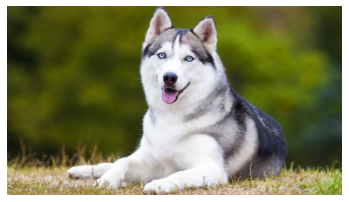

In [4]:
# 以OpenCV檢視輸入影像
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests

# 從網路獲取一張影像
file = requests.get("https://images.chinatimes.com/newsphoto/2021-04-05/1024/20210405002742.jpg")
# 將影像轉成OpenCV格式存入img中
img = cv2.imdecode(np.frombuffer(file.content, np.uint8), 1)
# 將img寫入磁碟命名為input.jpg
cv2.imwrite('input.jpg',img)

# 亦可直接讀取本地端影像
# img = cv2.imread('input.jpg')

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 將影像從BGR格式轉到RGB格式，才能讓plt.imshow()正確顯示
plt.figure() # 準備一顯示影像空間
plt.axis("off") # 設定關閉XY軸刻尺
plt.imshow(rgb) # 顯示影像

# 5.進行推論

在OpenVINO中大部份的範例程式都放在/opt/intel/openvino_2021/deployment_tools/inference_engine/demos中，但影像辨識是最基本的範例，所以不在其中，而是放在/opt/intel/openvino_2021/inference_engine/samples/python/下。  
這裡使用/python/hello_classification/hello_classification.py來進行影像分類測試。這個範例適用上述數十種模型。    
另外要依據不同的模型所對應的資料集給予標籤檔案，預設放在/opt/intel/openvino_2021/deployment_tools/open_model_zoo/data/dataset_classes下。

輸入參數：  
-i 輸入影像名稱 (.png, .jpg ...)  
-m 模型名稱 (.xml)  
-nt 輸出置信度排序最高的前幾項（選配參數，預設為Top 10）  
--labels 標籤名稱檔(.txt) （選配參數，不使用時會以id編號輸出，這裡要搭配無id之標籤檔案）  

最後顯示推論結果，包括分類編號(classid)及置信度(probability)  

In [5]:
# 列出可支援標籤檔案(此步驟可忽略)
!ls /opt/intel/openvino_2021.3.394/deployment_tools/open_model_zoo/data/dataset_classes

aclnet_53cl.txt      coco_91cl.txt	   msasl100.json
cityscapes_19cl.txt  imagenet_2012.txt	   scut_ept.txt
coco_80cl_bkgr.txt   imagenet_2015.txt	   voc_20cl_bkgr.txt
coco_80cl.txt	     jester27.json	   voc_20cl.txt
coco_91cl_bkgr.txt   kondate_nakayosi.txt


In [6]:
# 複製無文字id的ImageNet 1000分類標籤檔到使用者目錄
!cp /opt/intel/openvino_2021/deployment_tools/demo/squeezenet1.1.labels imagenet_label.txt
!ls

# 設定環境變數執行影像分類推論
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
python3 \
/opt/intel/openvino_2021/inference_engine/samples/python/hello_classification/hello_classification.py \
-i 'input.jpg' \
-m public/resnet-34-pytorch/FP32/resnet-34-pytorch.xml \
--labels "imagenet_label.txt"

GPG-PUB-KEY-INTEL-OPENVINO-2021  input.jpg  sample_data
imagenet_label.txt		 public
[setupvars.sh] OpenVINO environment initialized
[ INFO ] Creating Inference Engine
[ INFO ] Loading network:
	public/resnet-34-pytorch/FP32/resnet-34-pytorch.xml
[ INFO ] Preparing input blobs
[ WARNING ] Image input.jpg is resized from (576, 1024) to (224, 224)
[ INFO ] Loading model to the plugin
[ INFO ] Starting inference in synchronous mode
[ INFO ] Processing output blob
[ INFO ] Top 10 results: 
Image input.jpg

classid probability
------- -----------
dog, husky 20.7688637
 husky   19.8722458
malemute, Alaskan malamute17.8152275
elkhound, elkhound12.2419424
collie   11.7569017
wolf, grey wolf, gray wolf, Canis lupus10.4696951
Cardigan Welsh corgi10.2310362
dog sled, dog sleigh10.2000027
shepherd, German shepherd dog, German police dog, alsatian10.0990477
collie   9.7165003


[ INFO ] This sample is an API example, for any performance measurements please use the dedicated benchmark_app tool

